<h1> Notebook for exploration and processing of data </h1>

<h2> First access and process images </h2>

In [22]:
#importing libraries
import tensorflow.keras as keras
import tensorflow
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range = 0.2, horizontal_flip=True, validation_split=0.2)


In [3]:
train_generator = train_datagen.flow_from_directory('../BirdsData/KaggleData/images', class_mode="categorical", subset = 'training')
test_generator = train_datagen.flow_from_directory('../BirdsData/KaggleData/images', class_mode="categorical", subset = 'validation')

Found 41817 images belonging to 424 classes.
Found 10286 images belonging to 424 classes.


Class Detected: CUBAN TODY


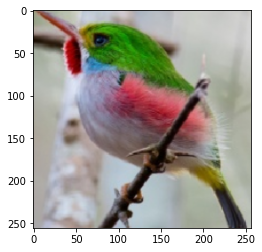

In [8]:
classDict = train_generator.class_indices
random_batch = train_generator.next()
image_label = random_batch[1][0]
random_image = random_batch[0][0]

index = np.where(image_label==1.0)[0][0]
titleStr = list(classDict.keys())[list(classDict.values()).index(index)]

print("Class Detected: " + titleStr)
plt.imshow(random_image)

<h2>Running pretrained model</h2>

Using Xception model trained on ImageNet

In [9]:
base_model = keras.applications.xception.Xception(weights="imagenet", include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(train_generator.num_classes, activation="softmax")(avg)
model = keras.Model(inputs=base_model.input, outputs=output)

# Freezing layers of base model
for layer in base_model.layers:
    layer.trainable = False

In [62]:
optimizer = keras.optimizers.SGD(learning_rate= 0.2, momentum=0.9,decay = 0.01)
model.compile(loss="categorical_crossentropy", optimizer= optimizer, metrics=["accuracy"])
history = model.fit(train_generator,epochs = 5,validation_data=test_generator)

Epoch 1/5
1307/1307 [==============================] - 2306s 2s/step - loss: 0.9919 - accuracy: 0.7534 - val_loss: 0.9221 - val_accuracy: 0.7738
Epoch 2/5
1307/1307 [==============================] - 2364s 2s/step - loss: 0.7125 - accuracy: 0.8309 - val_loss: 0.8875 - val_accuracy: 0.7830
Epoch 3/5
1307/1307 [==============================] - 2317s 2s/step - loss: 0.6733 - accuracy: 0.8408 - val_loss: 0.8606 - val_accuracy: 0.7877
Epoch 4/5
1307/1307 [==============================] - 3166s 2s/step - loss: 0.6482 - accuracy: 0.8485 - val_loss: 0.8516 - val_accuracy: 0.7892
Epoch 5/5
1307/1307 [==============================] - 2343s 2s/step - loss: 0.6328 - accuracy: 0.8525 - val_loss: 0.8447 - val_accuracy: 0.7958


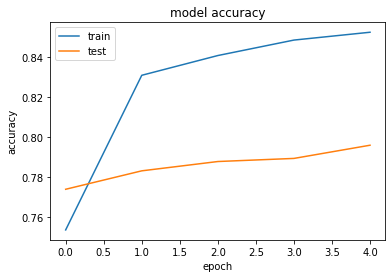

In [63]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

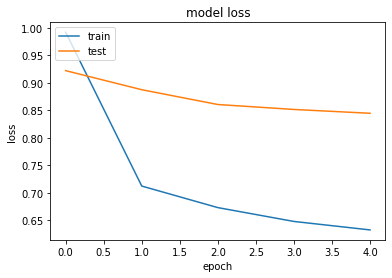

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Class Predicted: PYGMY KINGFISHER
Class Predicted 2: MALACHITE KINGFISHER
Class Predicted 3: 083.White_breasted_Kingfisher


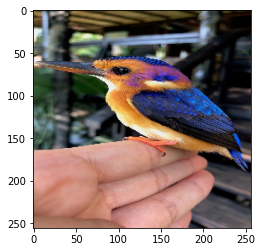

In [65]:
classDict = test_generator.class_indices
random_batch = test_generator.next()
random_image = img_to_array(load_img('./test.jpg', target_size=(256,256)))/255


prediction = model.predict(np.expand_dims(random_image, axis = 0))
indexP = prediction[0].argsort()[-3:][::-1]
titleStrP = list(classDict.keys())[list(classDict.values()).index(indexP[0])]
print("Class Predicted: " + titleStrP)
titleStrP = list(classDict.keys())[list(classDict.values()).index(indexP[1])]
print("Class Predicted 2: " + titleStrP)
titleStrP = list(classDict.keys())[list(classDict.values()).index(indexP[2])]
print("Class Predicted 3: " + titleStrP)
plt.imshow(random_image)

In [66]:
model.save('./models/')

C:\Users\apran\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: ./models/assets


In [48]:
tensorflow.config.list_physical_devices('GPU')

[]